# Example R barplots with the Cars93 dataset

What can barplots tell us? 
- a general graphical sense of the contents of one or two variables in our dataset
- typically used on categorical data
- a visual contingency table between two variables
- assist in data exploration

NOTE on fiddling with sizes of axis annotations:
- to adjust x label magnification: cex.names=0.75
- to adjust y label magnification: cex.axis=0.75

The example barplots in this Notebook use the base R plotting routine, barplot().

In [29]:
# First load the Cars93 dataset:
library(MASS)
cr = Cars93

# list all the column names in the dataset:
names(cr)

[1] "Manufacturer"       "Model"              "Type"              
 [4] "Min.Price"          "Price"              "Max.Price"         
 [7] "MPG.city"           "MPG.highway"        "AirBags"           
[10] "DriveTrain"         "Cylinders"          "EngineSize"        
[13] "Horsepower"         "RPM"                "Rev.per.mile"      
[16] "Man.trans.avail"    "Fuel.tank.capacity" "Passengers"        
[19] "Length"             "Wheelbase"          "Width"             
[22] "Turn.circle"        "Rear.seat.room"     "Luggage.room"      
[25] "Weight"             "Origin"             "Make"

In [30]:
# Let's take a peek at the dataset:
cr[c(1:10),c(1:10)]

Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain
Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front
Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front
Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front
Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front
BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear
Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front
Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front
Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear
Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front
Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front


In the cars dataset, how many cylinders does the typical car have? Compute a contingency table using table() to find out the counts in each category.

In [31]:
table(cr$Cylinders)


     3      4      5      6      8 rotary 
     3     49      2     31      7      1 

Use a barplot to visualize this contingency table of cylinder count for the cars. First, call R's table() function, then create a barplot with the output.

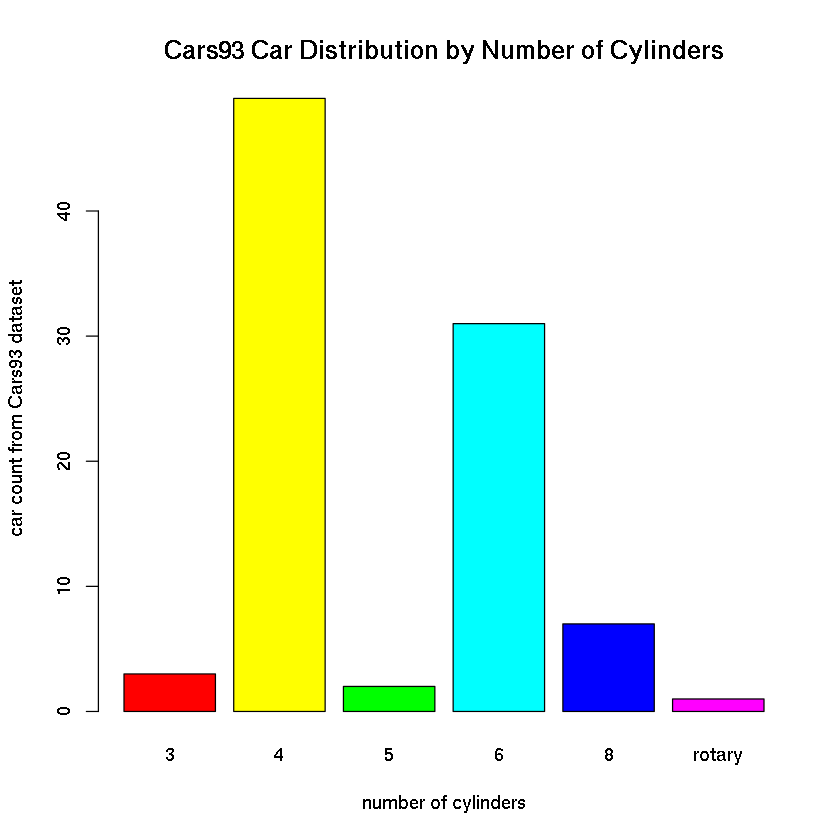

In [32]:
# View the car dataset by # cylinders, using a barplot

# Create the contingency table
counts=table(cr$Cylinders) 
title="Cars93 Car Distribution by Number of Cylinders"

# each x-axis category (here, each value for Cylinder count) gets its own color
colors=rainbow(length(counts))

# Draw the plot
barplot(counts, 
    main=title,
    xlab="number of cylinders", 
    ylab="car count from Cars93 dataset",
    col=colors)

## Cars data by Auto Type

Create a barplot of the Cars data by Auto Type. Order the Type by Weight before creating the contingency table. Now the auto weights increase from left to right in the plot.

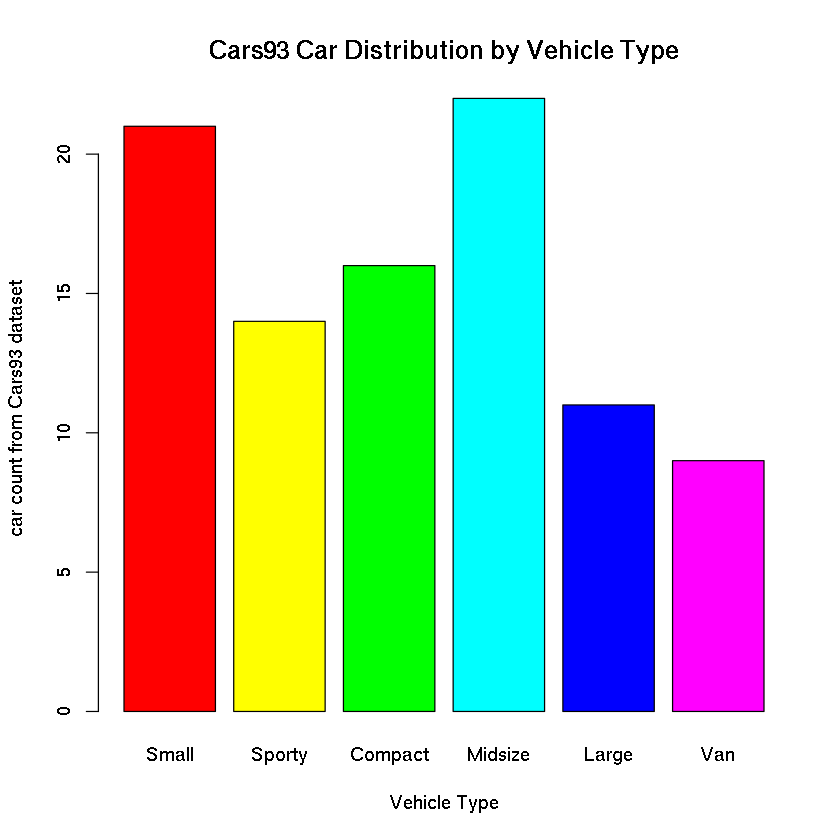

In [33]:
#--- Auto Type barplot ---

# This command orders the Type alphabetically (not too meaningful):
# counts=table(cr$Type) 

# Better: order the Type by Weight, then create the contingency table:
type=reorder(cr$Type,cr$Weight)
counts=table(type) 

# each x-axis category gets its own color
colors=rainbow(length(counts))        
title="Cars93 Car Distribution by Vehicle Type"

# draw the barplot
barplot(counts, 
    main=title,
    xlab="Vehicle Type", 
    ylab="car count from Cars93 dataset",
    col=colors)        

## Barplot on Auto Manufacturer

Here, order the dataset by auto manufacturer (alphabetically)

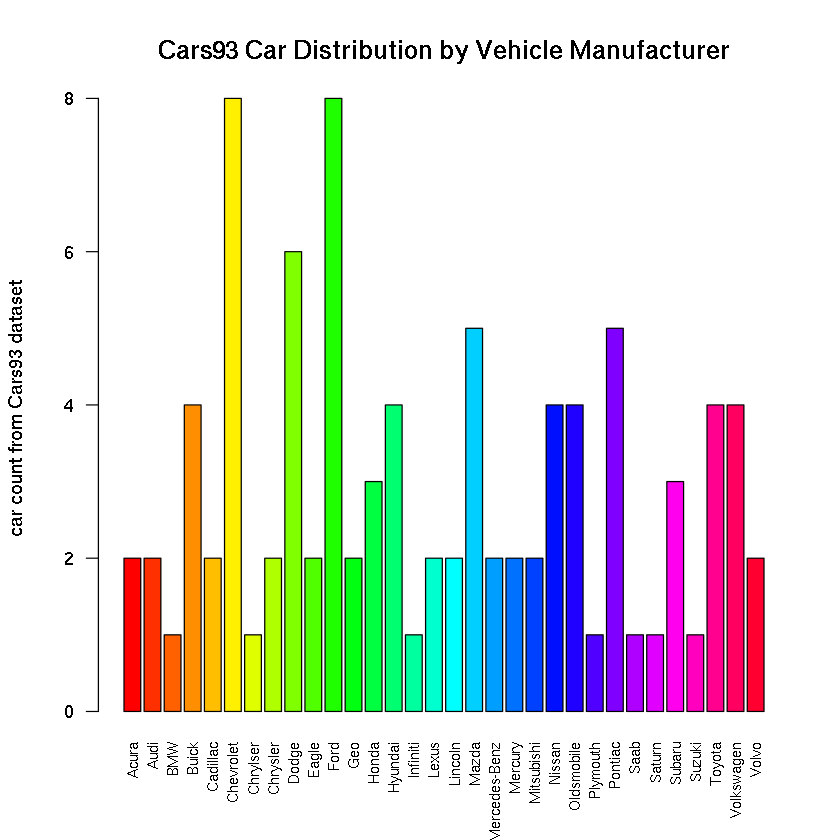

In [34]:
#--- Auto Manufacturer barplot ---

# contingency table will be alphabetical, if we don't order it first:
counts=table(cr$Manufacturer) 

# colors for the manufacturer values:
colors=rainbow(length(counts))      
title="Cars93 Car Distribution by Vehicle Manufacturer"  

# draw the barplot
barplot(counts, 
    main=title,
    cex.names=0.7,   # adjust size of x axis labels: 70%
    las=2,           # rotate x axis labels                
    xlab="",         # suppress name label for x axis
    ylab="car count from Cars93 dataset",
    col=colors)    

# Barplots using more than one variable

Barplots made on a combination of variables can provide insights into the data. Reorder the data using a sensible measure, then prepare the contingency table on the orderd output.

## Barplot of Auto Type and Transmission

This barplot of Cars orders the Car Types by weight first, then creates a contingency table with Transmission type and Vehicle type. The resulting plot shows classes of cars that increase in weight from left to right.

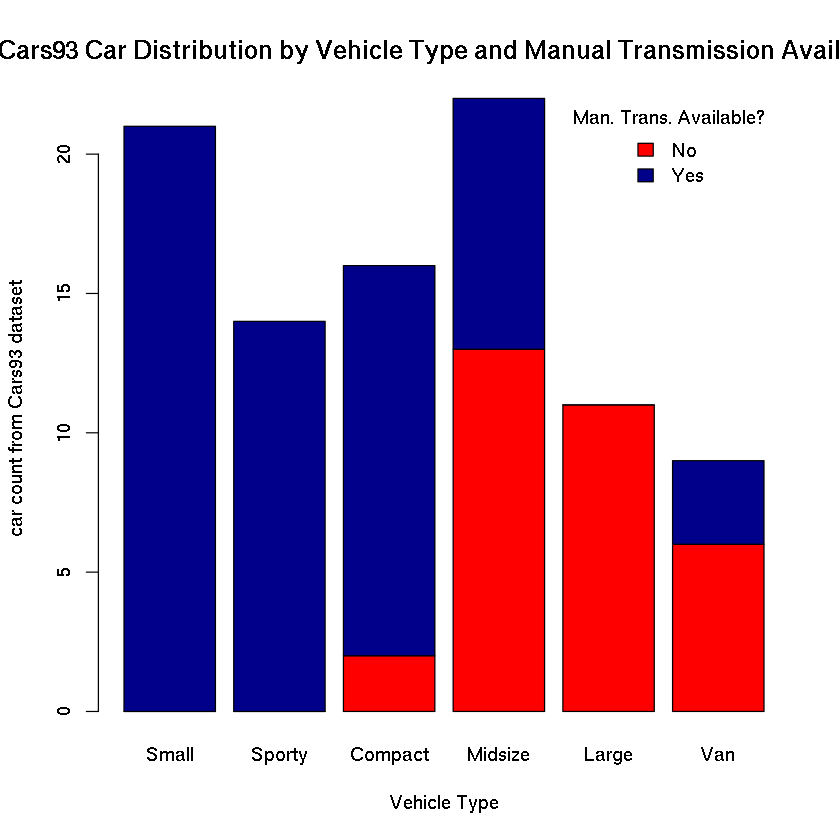

In [35]:
# ---------- Barplots on a combination of variables --------------

# As before, order the auto Type by Weight first:
type=reorder(cr$Type,cr$Weight)

# Create a contingency table on Transmission and Type (ordered by Weight):
counts=table(cr$Man.trans.avail, type) 
title="Cars93 Car Distribution by Vehicle Type and Manual Transmission Available"
barplot(counts, 
    main=title,
    xlab="Vehicle Type", 
    ylab="car count from Cars93 dataset",
    col=c("red","darkblue"))
    #legend=levels(cr$Man.trans.avail) # to specify legend in barplot call

# Prepare the legend to show the values of the 2nd variable
legend(x="topright",                        # location for legend
    title="Man. Trans. Available?",      # title for legend
    levels(cr$Man.trans.avail),          # names in legend
    bty="n",                             # box type to draw around legend
    fill=c("red","darkblue"))            # colors for legend

## Barplot of Max. Passenger Capacity and Vehicle Type

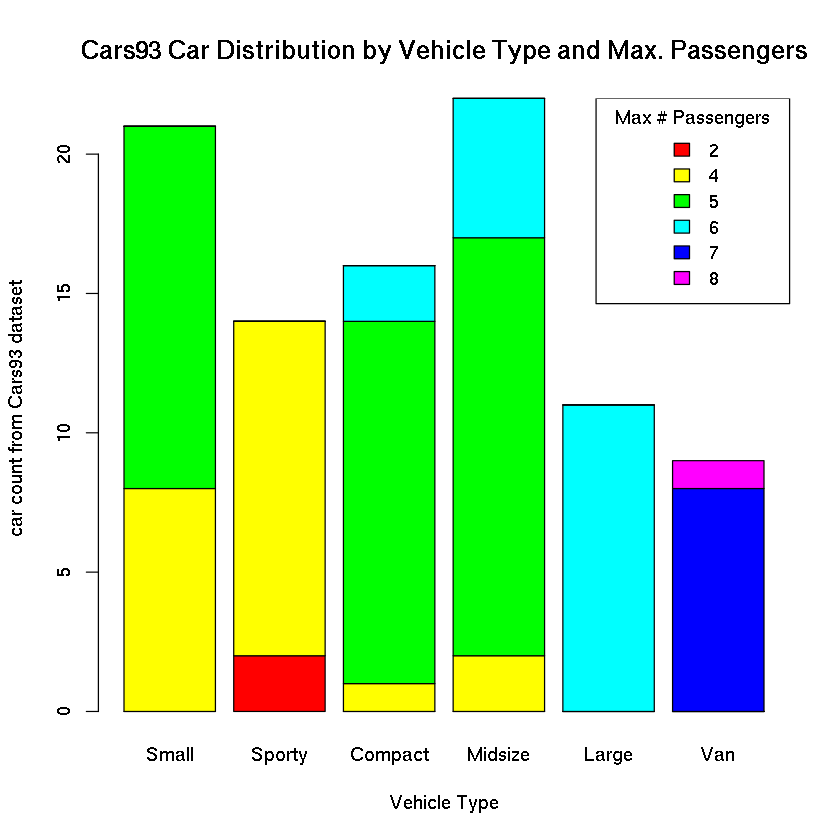

In [36]:
# --- Barplot on Passengers and Vehicle Type ---

# Order Type by Weight first:
type=reorder(cr$Type,cr$Weight)

# Create the contingency table:
counts=table(cr$Passengers, type) 

# Make the barplot
title="Cars93 Car Distribution by Vehicle Type and Max. Passengers"
barplot(counts, 
    main=title,
    xlab="Vehicle Type", 
    ylab="car count from Cars93 dataset",
    col=rainbow(length(table(cr$Passengers))))
    #legend=levels(factor(cr$Passengers))) 

# Prepare the legend to show the values of the 2nd variable:
legend(x="topright",                            # location for legend
    title="Max # Passengers",                   # title for legend
    levels(factor(cr$Passengers)),              # names in legend
    fill=rainbow(length(table(cr$Passengers)))) # colors for legend